<a href="https://colab.research.google.com/github/gham658/PenguinPredictor/blob/main/PenguinPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import os
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import pandas as pd

print("TensorFlow version: {}".format(tf.__version__))
print("TensorFlow Datasets version: ",tfds.__version__)

TensorFlow version: 2.9.2
TensorFlow Datasets version:  4.6.0


This model will be used to predict the species of penguin based on the features presented in the penguins dataset (https://allisonhorst.github.io/palmerpenguins/). This contains 344 entries of the features of penguins along with what species they are.

In [14]:
prev, info = tfds.load('penguins/simple', split='train', with_info=True)
df = tfds.as_dataframe(prev.take(5), info)
print(df)
print(info.features)
pd.DataFrame.describe(df)

   body_mass_g  culmen_depth_mm  culmen_length_mm  flipper_length_mm  island  \
0       4200.0             13.9         45.500000              210.0       0   
1       4650.0             13.7         40.900002              214.0       0   
2       5300.0             14.2         51.299999              218.0       0   
3       5650.0             15.0         47.799999              215.0       0   
4       5050.0             15.8         46.299999              215.0       0   

   sex  species  
0    0        2  
1    0        2  
2    1        2  
3    1        2  
4    1        2  
FeaturesDict({
    'body_mass_g': tf.float32,
    'culmen_depth_mm': tf.float32,
    'culmen_length_mm': tf.float32,
    'flipper_length_mm': tf.float32,
    'island': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    'sex': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    'species': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
})


,body_mass_g,culmen_depth_mm,culmen_length_mm,flipper_length_mm,island,sex,species
count,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,5.0
mean,4970.000000,14.520000,46.360001,214.399994,0.0,0.600000,2.0
std,564.136536,0.870058,3.775976,2.880972,0.0,0.547723,0.0
min,4200.000000,13.700000,40.900002,210.000000,0.0,0.000000,2.0
25%,4650.000000,13.900000,45.500000,214.000000,0.0,0.000000,2.0
50%,5050.000000,14.200000,46.299999,215.000000,0.0,1.000000,2.0
75%,5300.000000,15.000000,47.799999,215.000000,0.0,1.000000,2.0
max,5650.000000,15.800000,51.299999,218.000000,0.0,1.000000,2.0


The 3 classes are 'Adélie', 'Chinstrap', and 'Gentoo' respectively. In order to train and test the model the data is split into 80:20 percent groups 

In [4]:
class_names = ['Adélie', 'Chinstrap', 'Gentoo']

ds_split, info = tfds.load("penguins/processed", split=['train[:20%]', 'train[20%:]'], as_supervised=True, with_info=True)

ds_test = ds_split[0]
ds_train = ds_split[1]
assert isinstance(ds_test, tf.data.Dataset)

print(info.features)
df_test = tfds.as_dataframe(ds_test.take(5), info)
print("Test dataset sample: ")
print(df_test)

df_train = tfds.as_dataframe(ds_train.take(5), info)
print("Train dataset sample: ")
print(df_train)

ds_train_batch = ds_train.batch(32)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/334 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/penguins/processed/1.0.0.incompleteBBZC0O/penguins-train.tfrecord*...:   0%|  …

Dataset penguins downloaded and prepared to ~/tensorflow_datasets/penguins/processed/1.0.0. Subsequent calls will reuse this data.
FeaturesDict({
    'features': Tensor(shape=(4,), dtype=tf.float32),
    'species': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
})
Test dataset sample: 
                                         features  species
0  [0.6545454, 0.22619048, 0.89830506, 0.6388889]        2
1        [0.36, 0.04761905, 0.6440678, 0.4027778]        2
2       [0.68, 0.30952382, 0.91525424, 0.6944444]        2
3   [0.6181818, 0.20238096, 0.8135593, 0.6805556]        2
4  [0.5527273, 0.26190478, 0.84745765, 0.7083333]        2
Train dataset sample: 
                                         features  species
0  [0.49818182, 0.6904762, 0.42372882, 0.4027778]        0
1      [0.48, 0.071428575, 0.6440678, 0.44444445]        2
2    [0.7236364, 0.9047619, 0.6440678, 0.5833333]        1
3  [0.34545454, 0.5833333, 0.33898306, 0.3472222]        0
4       [0.10909091, 0.75, 0.355932

In this version the dataset was processed down to 4 normalized features and the species label for easy training.

In [5]:
features, labels = next(iter(ds_train_batch))

print(features)
print(labels)

tf.Tensor(
[[0.49818182 0.6904762  0.42372882 0.4027778 ]
 [0.48       0.07142857 0.6440678  0.44444445]
 [0.7236364  0.9047619  0.6440678  0.5833333 ]
 [0.34545454 0.5833333  0.33898306 0.3472222 ]
 [0.10909091 0.75       0.3559322  0.41666666]
 [0.6690909  0.63095236 0.47457626 0.19444445]
 [0.8036364  0.9166667  0.4915254  0.44444445]
 [0.4909091  0.75       0.37288135 0.22916667]
 [0.33454546 0.85714287 0.37288135 0.2361111 ]
 [0.32       0.41666666 0.2542373  0.1388889 ]
 [0.41454545 0.5952381  0.5084746  0.19444445]
 [0.14909092 0.48809522 0.2542373  0.125     ]
 [0.23636363 0.4642857  0.27118644 0.05555556]
 [0.22181818 0.5952381  0.22033899 0.3472222 ]
 [0.24727273 0.5595238  0.15254237 0.25694445]
 [0.63272727 0.35714287 0.88135594 0.8194444 ]
 [0.47272727 0.15476191 0.6440678  0.4722222 ]
 [0.6036364  0.23809524 0.84745765 0.7361111 ]
 [0.26909092 0.5595238  0.27118644 0.16666667]
 [0.28       0.71428573 0.20338982 0.5416667 ]
 [0.10545454 0.5714286  0.33898306 0.2847222 ]
 [

To create the model, I used the Keras sequential function with 2 layers of 10 nodes each, and an output layer of 3 nodes (one for each of the classifications)

In [59]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

We can use the model to create predictions now, however without training the model will not be all that accurate.

In [48]:
predictions = model(features)
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.33050603, 0.34010407, 0.32938987],
       [0.27379724, 0.33554637, 0.3906564 ],
       [0.32537177, 0.34412336, 0.3305048 ],
       [0.33266124, 0.33690822, 0.33043045],
       [0.34057042, 0.3335276 , 0.325902  ]], dtype=float32)>

And the results for untrained:

In [49]:
print("Prediction: {}".format(tf.math.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [1 2 1 1 0 1 1 1 0 1 1 0 0 0 0 2 2 2 0 0 0 0 2 2 1 2 0 2 2 2 2 0]
    Labels: [0 2 1 0 0 1 1 1 0 1 1 0 0 0 0 2 2 2 0 0 0 0 2 2 1 2 0 2 2 2 2 0]


Calculating loss and gradients in order to train the model optimally.

In [60]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  y_ = model(x, training=training)

  return loss_object(y_true=y, y_pred=y_)

l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))

def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

Loss test: 1.0837953090667725


In order to optimize the model we will use keras.optimization.SGD with a learning rate of ___

In [57]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels, training=True).numpy()))

Step: 0, Initial Loss: 1.1099406480789185
Step: 1,         Loss: 1.1087626218795776


In [61]:
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in ds_train_batch:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)

    epoch_accuracy.update_state(y, model(x, training=True))

  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.074, Accuracy: 45.693%
Epoch 050: Loss: 0.673, Accuracy: 80.524%
Epoch 100: Loss: 0.396, Accuracy: 80.524%
Epoch 150: Loss: 0.273, Accuracy: 94.007%
Epoch 200: Loss: 0.192, Accuracy: 95.506%


Some visualizations of model performace

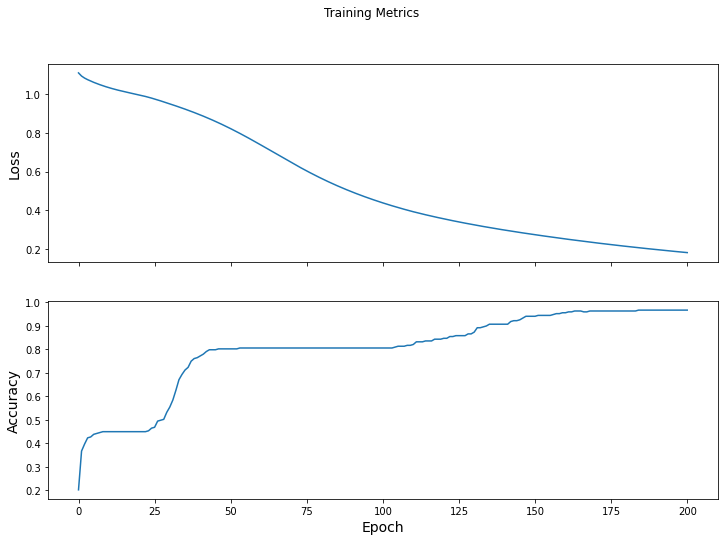

In [34]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

Now to test the model wit hthe perviously created test set

In [35]:
test_accuracy = tf.keras.metrics.Accuracy()
ds_test_batch = ds_test.batch(10)

for (x, y) in ds_test_batch:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=False)
  prediction = tf.math.argmax(logits, axis=1, output_type=tf.int64)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 97.015%


And to see the actual predictions

In [36]:
tf.stack([y,prediction],axis=1)

<tf.Tensor: shape=(7, 2), dtype=int64, numpy=
array([[1, 1],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [0, 0]])>

And if we give the model some normalized features of the penguins

In [45]:
predict_dataset = tf.convert_to_tensor([
  [0.6, 0.8, 0.1, 0.4],
  [1.0, 1.0, 1.0, 1.0],
  [0, 0, 0, 0],
  [0.7, 0.4, 0.4, 0.7]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
  class_idx = tf.math.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Index {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Index 0 prediction: Adélie (71.1%)
Index 1 prediction: Gentoo (91.7%)
Index 2 prediction: Adélie (85.5%)
Index 3 prediction: Gentoo (71.5%)
